## Generador de camino aleatorio
#### Integrantes:
- Jaime Mendoza
- Juan Javier Miño
- Felipe Robalino
- Oscar Albuja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm, trange

In [2]:
def get_path(seed=1492, N=10, xlimit=(-5,3), linea='o--', direcciones=10):
    angulo = 360/direcciones

    np.random.seed(seed)
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x = [0.]
    c_y = [0.]
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
        
    plt.plot(c_x, c_y, linea)
    plt.xlim(xlimit)

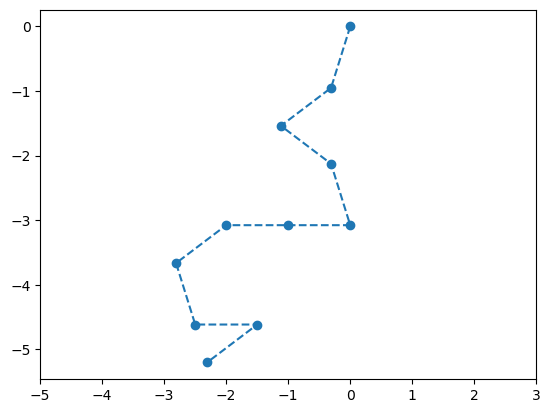

In [3]:
# Con 10 pasos
get_path()

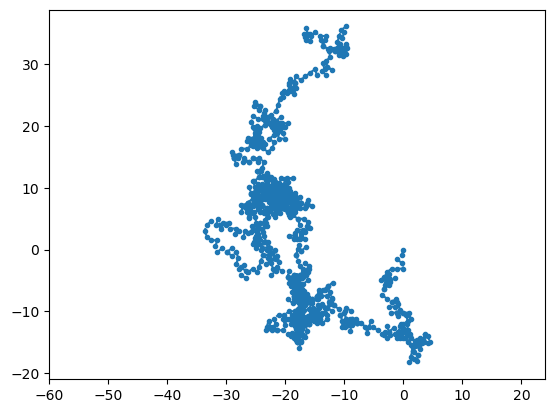

In [4]:
# Con 1000 pasos
get_path(N=1000, xlimit=(-60,24), linea='.--')

In [5]:
def get_path_origin(N=10, direcciones=10):
    angulo = 360/direcciones
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x, c_y = [0.], [0.]
    
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
    
    c_x_r,c_y_r = np.round(c_x, 2), np.round(c_y, 2)
    x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

    origenes = []
    for x, y in zip(x_0, y_0):
        if x == y:
            origenes.append(x)

    return origenes
    

# Discussion
#### **¿Cuál es la probabilidad de que el camino regrese al origen?**
### Teoria:
    La teoria es que los caminos aleatorios tienden a alejarse del origen, sin embargo, la forma más probable para que regrese al origen es si el segundo paso es el contrario del primero, es decir, si el primer paso es a 90°, el segundo paso debe ser hacia 270°.
    
    Por esto, la probabilidad de que el camino regrese al origen es de 1/n, donde n es el numero de pasos posibles.
**Para el ejercicio propuesto la probabilidad de que llegue al origen es del 10%**,   Ya que hay 10 pasos posibles [0:9]
    
    Además, la probabilidad de este suceso para un camino con numero de pasos posibles impar es casi 0, esto se debe porque no hay un paso que simetrico contrario al primero.
### Simulacion:
    Para esta probar esta teoria se realiza la simulacion de 100000 caminos aleatorios de 100 pasos cada uno, esto se repite por pasos posibles, desde el 4 hasta el 34.

In [6]:
theory=[]
for direcciones in range(4, 35):
    theory.append((direcciones, 1/direcciones))

In [7]:
times = 100000
probabilidad = []
for direcciones in trange(4, 35):
    regresa = []
    for i in range(times):
        origenes = get_path_origin( N=100, direcciones=direcciones)
        r = any(origenes)
        regresa.append(r)      
    probabilidad.append((direcciones, len(np.where(regresa)[0])/times))

  0%|          | 0/31 [00:00<?, ?it/s]

<BarContainer object of 31 artists>

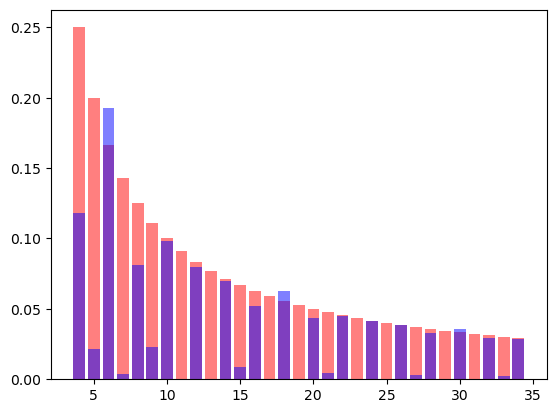

In [8]:
th = theory
pr = probabilidad
plt.bar(*zip(*th), color='red', alpha=0.5)
plt.bar(*zip(*pr), color='blue', alpha=0.5)
# El azul es la simulación y el rojo la teoría

### Observacion

    Se puede ver como, po ejemplo, al momento de tener 10 pasos la probabilidad de regresar al origen el del 0.1, es decir, 1/10, y para 20 pasos es de ~0.05, es decir, 1/20.
    Además, se demuestra como las simulaciones con pasos posibles impares tienen una probabilidad de regresar al origen de casi 0.
    Podemos decir que la teoria es correcta.

    Sin embargo, las probabilidades simuladas para 4 y 6 pasos son considerablemente diferentes a la teoria a la que se compara, la presunta razón de esto es que la geometria de los caminos no es perfecta, lo cual se amplifica con un numero de pasos tan pequeño. Cuando los pasos posibles aumentan, los caminos se vuelven más simetricos y la probabilidad simulada se acerca a la teoria.
    

<BarContainer object of 16 artists>

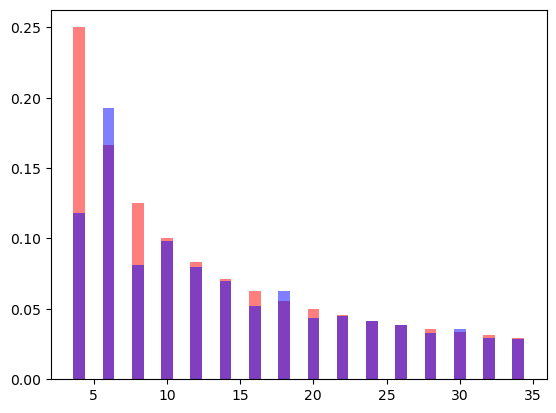

In [12]:
theory_p = [x for x in theory if x[0] % 2 == 0]
probabilidad_p = [x for x in probabilidad if x[0] % 2 == 0]
th = theory_p
pr = probabilidad_p
plt.bar(*zip(*th), color='red', alpha=0.5)
plt.bar(*zip(*pr), color='blue', alpha=0.5)
# Grafico mostrando solo las pares y su comparacion teorica

### **Conclusion**
    Con estas simulaciones se puede comprobar que la teoría se asemeja a la práctica siempre y cuando el valor de las direcciones sea par. Esto se da debido a la distribución de las direcciones, como el paso que volvía al origen, usualmente, era el inicial, si se tiene una distribución de direcciones impar, no existen direcciones contrarias, y por ende, es imposible que el camino regrese al origen en los primeros pasos.

In [172]:
def get_origin_probability(iteraciones=1000, pasos = 100000):
    llego=[]
    for _ in trange(iteraciones):

        nums = [np.random.randint(10) for i in range(pasos)]
        angulos = [(x*36)*math.pi/180 for x in nums]
        
        x_coor = [math.cos(angulo) for angulo in angulos]
        y_coor = [math.sin(angulo) for angulo in angulos]
        c_x = [0.]
        c_y = [0.]
        for x, y in zip(x_coor, y_coor):
            c_x.append(c_x[-1] + x)
            c_y.append(c_y[-1] + y)
        c_x_r = np.round(c_x, 4)
        c_y_r = np.round(c_y, 4)

        x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

        origenes = []
        for x, y in zip(x_0, y_0):
            if x == y:
                origenes.append(x)

        llego.append(any(origenes))

    return len(np.where(llego)[0])/iteraciones


probabilidades = []
for pasos in tqdm([1000, 50000, 100000, 200000]):
    for iteraciones in tqdm([100, 5000, 10000]):
        print(f'Pasos: {pasos}, Iteraciones: {iteraciones}', end=' ')
        probabilidad = get_origin_probability(pasos=pasos, iteraciones=iteraciones)
        print(f'Probabilidad: {probabilidad}')
        probabilidades.append(probabilidad)